In [23]:
import requests
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry.polygon import orient
import maup
import warnings


In [ ]:
def generate_unique_id(df, county_col, prec_code_col, unique_id_col='UNIQUE_ID'):
    # Generate the initial UNIQUE_ID
    df[unique_id_col] = (
        df[county_col] + '_PRECINCT_' +
        df[prec_code_col].astype(str)
    )

    # Append suffix to resolve duplicates
    df[unique_id_col] = (
        df[unique_id_col] +
        '_' +
        df.groupby(unique_id_col).cumcount().astype(str).replace('0', '')
    )
    
    return df


## Querying State and CD Boundaries data from TIGERweb

In [320]:
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb"
sc_counties_url = url + "/" + "State_County/MapServer/1/query?where=STATE='45'&outFields=NAME,COUNTY&f=geojson"
md_counties_url = url + "/" + "State_County/MapServer/1/query?where=STATE='24'&outFields=NAME,COUNTY&f=geojson"


sc_SLDL_url = url + "/" + "Legislative/MapServer/2/query?where=STATE='45'&outFields=NAME&f=geojson"
md_SLDL_url = url + "/" + "Legislative/MapServer/2/query?where=STATE='24'&outFields=NAME&f=geojson"


sc_SLDU_url = url + "/" + "Legislative/MapServer/1/query?where=STATE='45'&outFields=NAME&f=geojson"
md_SLDU_url = url + "/" + "Legislative/MapServer/1/query?where=STATE='24'&outFields=NAME&f=geojson"

sc_CD_url = url + "/" + "Legislative/MapServer/0/query?where=STATE='45'&outFields=NAME&f=geojson"
md_CD_url = url + "/" + "Legislative/MapServer/0/query?where=STATE='24'&outFields=NAME&f=geojson"

sc_state_url = url + "/" + "State_County/MapServer/0/query?where=STATE='45'&outFields=NAME&f=geojson"
md_state_url = url + "/" + "State_County/MapServer/0/query?where=STATE='24'&outFields=NAME&f=geojson"

In [21]:
response = requests.get(sc_CD_url)
output_file  = "south_carolina_cd.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("SC SLDL:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

SC SLDL:
- Congressional District 1
- Congressional District 2
- Congressional District 3
- Congressional District 4
- Congressional District 5
- Congressional District 6
- Congressional District 7
GeoJSON data with county boundaries successfully saved to south_carolina_cd.geojson


In [18]:
response = requests.get(md_CD_url)
output_file  = "maryland_cd.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("MD CD:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

MD CD:
- Congressional District 1
- Congressional District 2
- Congressional District 3
- Congressional District 4
- Congressional District 5
- Congressional District 6
- Congressional District 7
- Congressional District 8
GeoJSON data with county boundaries successfully saved to maryland_cd.geojson


In [2]:
response = requests.get(md_state_url)
output_file  = "maryland_state.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("MD State:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

MD State:
- Maryland
GeoJSON data with county boundaries successfully saved to maryland_state.geojson


In [3]:
response = requests.get(sc_state_url)
output_file  = "south_carolina_state.geojson"
if response.status_code == 200:
    geojson_data = response.json()
    
    if "features" in geojson_data and len(geojson_data["features"]) > 0:
        names = [feature['properties']['NAME'] for feature in geojson_data['features']]
        print("SC State:")
        for name in names:
            print(f"- {name}")
        with open(output_file, 'w') as file:
            json.dump(geojson_data, file, indent=4)
        
        print(f"GeoJSON data with county boundaries successfully saved to {output_file}")
    else:
        print("No county features found in the response. Please check the query parameters.")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")

SC State:
- South Carolina
GeoJSON data with county boundaries successfully saved to south_carolina_state.geojson


## Querying Precincts Boundaries data from downloaded files

In [115]:
# sc_precincts_gdf = gpd.read_file('raw/precincts/sc_2022_gen_prec/sc_2022_gen_st_prec/sc_2022_gen_st_prec.shp')
sc_precincts_ui_gdf = gpd.read_file('raw/precincts/sc_2022_gen_prec/sc_2022_gen_st_prec/sc_2022_gen_st_prec.shp')

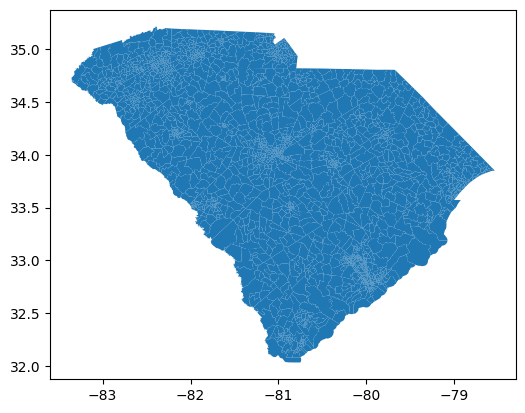

In [116]:
sc_precincts_gdf.plot()
plt.show()

In [84]:
print(sc_precincts_gdf.columns.values)

['UNIQUE_ID' 'COUNTYFP' 'County' 'Precinct' 'Prec_Code' 'G22A1NO'
 'G22A1YES' 'G22A2NO' 'G22A2YES' 'G22AGRCNEL' 'G22AGRGEDM' 'G22AGROWRI'
 'G22AGRRWEA' 'G22ATGOWRI' 'G22ATGRWIL' 'G22COMOWRI' 'G22COMRECK'
 'G22GOVDCUN' 'G22GOVLREE' 'G22GOVOWRI' 'G22GOVRMCM' 'G22SOSDBUT'
 'G22SOSOWRI' 'G22SOSRHAM' 'G22SUPAELL' 'G22SUPDELL' 'G22SUPGMIC'
 'G22SUPOWRI' 'G22SUPRWEA' 'G22TREAWOR' 'G22TREOWRI' 'G22TRERLOF'
 'G22USSDMAT' 'G22USSOWRI' 'G22USSRSCO' 'geometry']


In [85]:
print(sc_precincts_gdf.head())

                     UNIQUE_ID COUNTYFP     County         Precinct Prec_Code  \
0  ABBEVILLE-:-ABBEVILLE NO. 1      001  ABBEVILLE  ABBEVILLE NO. 1       001   
1  ABBEVILLE-:-ABBEVILLE NO. 2      001  ABBEVILLE  ABBEVILLE NO. 2       002   
2  ABBEVILLE-:-ABBEVILLE NO. 3      001  ABBEVILLE  ABBEVILLE NO. 3       003   
3  ABBEVILLE-:-ABBEVILLE NO. 4      001  ABBEVILLE  ABBEVILLE NO. 4       004   
4       ABBEVILLE-:-ANTREVILLE      001  ABBEVILLE       ANTREVILLE       005   

   G22A1NO  G22A1YES  G22A2NO  G22A2YES  G22AGRCNEL  ...  G22SUPGMIC  \
0      355       547      346       554          37  ...          16   
1      254       275      252       274          57  ...           8   
2      219       284      241       279          30  ...          10   
3      197       208      174       242          16  ...           6   
4      280       375      297       375          24  ...          11   

   G22SUPOWRI  G22SUPRWEA  G22TREAWOR  G22TREOWRI  G22TRERLOF  G22USSDMAT  \
0  

In [86]:
sc_precincts_gdf.rename(columns={'Precinct': 'NAME'}, inplace=True)


In [87]:
print(sc_precincts_gdf.columns.values)

['UNIQUE_ID' 'COUNTYFP' 'County' 'NAME' 'Prec_Code' 'G22A1NO' 'G22A1YES'
 'G22A2NO' 'G22A2YES' 'G22AGRCNEL' 'G22AGRGEDM' 'G22AGROWRI' 'G22AGRRWEA'
 'G22ATGOWRI' 'G22ATGRWIL' 'G22COMOWRI' 'G22COMRECK' 'G22GOVDCUN'
 'G22GOVLREE' 'G22GOVOWRI' 'G22GOVRMCM' 'G22SOSDBUT' 'G22SOSOWRI'
 'G22SOSRHAM' 'G22SUPAELL' 'G22SUPDELL' 'G22SUPGMIC' 'G22SUPOWRI'
 'G22SUPRWEA' 'G22TREAWOR' 'G22TREOWRI' 'G22TRERLOF' 'G22USSDMAT'
 'G22USSOWRI' 'G22USSRSCO' 'geometry']


In [ ]:
sc_precincts_gdf['UNIQUE_ID'] = (
    sc_precincts_gdf['County'] + '_PRECINCT_' +
    sc_precincts_gdf['Prec_Code'].astype(str)
)
sc_precincts_gdf['UNIQUE_ID'] = (
    sc_precincts_gdf['UNIQUE_ID'] +
    '_' +
    sc_precincts_gdf.groupby('UNIQUE_ID').cumcount().astype(str).replace('0', '')
)


In [90]:
print(len(sc_precincts_gdf))

2261


In [92]:
maup.doctor(sc_precincts_gdf)

There are 969 overlaps.
There are 8325 holes.


False

In [93]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sc_precincts_fix_gdf = maup.smart_repair(sc_precincts_gdf)

Snapping all geometries to a grid with precision 10^( -4 ) to avoid GEOS errors.
Identifying overlaps...
Resolving overlaps...
Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to fill: 100%|██████████| 244/244 [01:09<00:00,  3.52it/s]


In [56]:
print(maup.doctor(sc_precincts_fix_gdf))

True


In [94]:
#print len with unique id
print(len(sc_precincts_fix_gdf['UNIQUE_ID'].unique()))


2261


In [79]:
# Get the DataFrame of duplicates
duplicates_df = sc_precincts_fix_gdf[sc_precincts_gdf.duplicated(subset='UNIQUE_ID', keep=False)]

# Get the DataFrame with duplicates removed, keeping only the first occurrence as original
original_df = sc_precincts_fix_gdf.drop_duplicates(subset='UNIQUE_ID', keep='first')

# Compare the geometries
comparison_df = duplicates_df.merge(original_df, on='UNIQUE_ID', suffixes=('_duplicate', '_original'))

# Display the comparison DataFrame
comparison_df[['UNIQUE_ID', 'geometry_duplicate', 'geometry_original']]

,UNIQUE_ID,geometry_duplicate,geometry_original
0,BEAUFORT_PRECINCT_315,"POLYGON ((2045824.681 155065.128, 2045812.117 ...","POLYGON ((2045824.681 155065.128, 2045812.117 ..."
1,BEAUFORT_PRECINCT_3151,"POLYGON ((2033141.799 150511.482, 2033142.124 ...","POLYGON ((2033141.799 150511.482, 2033142.124 ..."
2,BEAUFORT_PRECINCT_183,"POLYGON ((2131856.362 214492.753, 2131856.361 ...","POLYGON ((2131856.362 214492.753, 2131856.361 ..."
3,BEAUFORT_PRECINCT_1831,"POLYGON ((2172543.165 230141.035, 2173191.456 ...","POLYGON ((2172543.165 230141.035, 2173191.456 ..."
4,YORK_PRECINCT_068,"POLYGON ((2001837.932 1159265.939, 2001752.403...","POLYGON ((2001837.932 1159265.939, 2001752.403..."
5,YORK_PRECINCT_0681,"POLYGON ((2002628.866 1169965.080, 2002628.866...","POLYGON ((2002628.866 1169965.080, 2002628.866..."


In [95]:
sc_districts_gdf = gpd.read_file('states/south_carolina/geodata/south_carolina_cd.geojson')

In [96]:
sc_districts_gdf = sc_districts_gdf.to_crs(sc_precincts_fix_gdf.crs)

In [97]:
assignment = maup.assign(sc_precincts_fix_gdf, sc_districts_gdf)

In [98]:
sc_precincts_fix_gdf['CONG_DIST'] = assignment.map(lambda x: f"{x+1:02}")

In [100]:
sc_precincts_fix_gdf = sc_precincts_fix_gdf[['UNIQUE_ID', 'NAME', 'Prec_Code', 'CONG_DIST', 'geometry']]

In [106]:
print(sc_precincts_fix_gdf.crs)

EPSG:2273


In [109]:
# check if valid 
print(sc_precincts_fix_gdf.is_valid)

0       True
1       True
2       True
3       True
4       True
        ... 
2256    True
2257    True
2258    True
2259    True
2260    True
Length: 2261, dtype: bool


In [107]:
# sc_precincts_gdf['geometry'] = sc_precincts_gdf['geometry'].apply(orient_geometry)
sc_precincts_gdf = sc_precincts_fix_gdf.to_crs(epsg=4326)

In [111]:
print(sc_precincts_gdf.is_valid.count())

2261


In [112]:
print(maup.doctor(sc_precincts_gdf))

/Users/tonymac/miniconda3/envs/cse354/lib/python3.11/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 4 overlaps.
There are 2 holes.
There are some invalid geometries.
False


In [103]:

sc_precincts_gdf.to_file(
    "states/south_carolina/geodata/south_carolina_precincts.geojson",
    driver="GeoJSON",
    drop_crs=True
)

In [104]:
md_precincts_gdf = gpd.read_file('processed_individual/fixed_geojson/maryland_precincts_fixed.geojson')

In [105]:
print(md_precincts_gdf.crs)

EPSG:2248


In [4]:
print(md_precincts_gdf.head())

                UNIQUE_ID Pre_Code CONG_DIST  \
0  HOWARD_PRECINCT_06-001   06-001        03   
1  HOWARD_PRECINCT_05-023   05-023        03   
2  HOWARD_PRECINCT_05-018   05-018        03   
3  HOWARD_PRECINCT_05-017   05-017        03   
4  HOWARD_PRECINCT_05-020   05-020        03   

                                            geometry  
0  POLYGON ((1364495.745 529857.061, 1364492.934 ...  
1  POLYGON ((1343191.760 567973.996, 1343047.359 ...  
2  POLYGON ((1344525.177 561849.349, 1344562.860 ...  
3  POLYGON ((1344517.525 561394.423, 1344562.860 ...  
4  POLYGON ((1318991.123 540840.415, 1318980.170 ...  


In [5]:
print(md_precincts_gdf.columns.values)

['UNIQUE_ID' 'Pre_Code' 'CONG_DIST' 'geometry']


In [396]:
md_precincts_gdf = md_precincts_gdf[['NAME','NUMBER', 'geometry']]

In [397]:
md_precincts_gdf['UNIQUE_ID'] = (
    # md_precincts_gdf.index.astype(str) + '_' + 
    md_precincts_gdf['NAME'].str.replace(' ', '_')
)


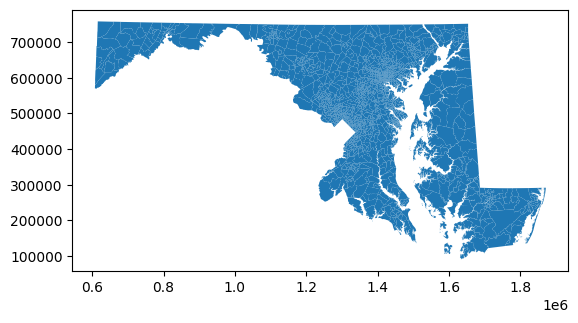

In [398]:
md_precincts_gdf.plot()
plt.show()

In [6]:
#remove duplicates
md_precincts_gdf = md_precincts_gdf.drop_duplicates(subset='UNIQUE_ID')

In [7]:
# GUI
md_precincts_gdf = md_precincts_gdf.to_crs(epsg=4326)


In [8]:
print(md_precincts_gdf.head())

                UNIQUE_ID Pre_Code CONG_DIST  \
0  HOWARD_PRECINCT_06-001   06-001        03   
1  HOWARD_PRECINCT_05-023   05-023        03   
2  HOWARD_PRECINCT_05-018   05-018        03   
3  HOWARD_PRECINCT_05-017   05-017        03   
4  HOWARD_PRECINCT_05-020   05-020        03   

                                            geometry  
0  POLYGON ((-76.81614 39.12142, -76.81615 39.121...  
1  POLYGON ((-76.89107 39.22616, -76.89158 39.225...  
2  POLYGON ((-76.88639 39.20934, -76.88626 39.208...  
3  POLYGON ((-76.88642 39.20809, -76.88626 39.208...  
4  POLYGON ((-76.97652 39.15171, -76.97656 39.151...  


In [9]:
md_precincts_gdf.to_file(
    "states/maryland/geodata/maryland_precincts.geojson",
    driver="GeoJSON",
    drop_crs=True
)